In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

## Preliminary Data Management

In [49]:
imdb = pd.read_table('C://Users//fergu//sentiment_labelled_sentences//imdb_labelled.txt', header=None)

In [50]:
imdb.columns=['comment', 'score']

In [51]:
imdb.shape

(748, 2)

In [52]:
imdb.head()

,comment,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


## Select Words for Use In Classifier

Starting dataset chosen this time: 'IMDB'. The words selected were adjectives that would positively describe a movie review, such as 'great', awesome', 'excellent', etc.

In [53]:
#gallery = [words, words2, words3, words4]


wordsss = ['great', 'funny', 'awesome', 'realistic', 'fantastic', 'loved', 
         'good', 'amazing', 'excellent', 'really good', 'splendid', 'best', 
         'outstanding', 'super', 'beautiful', 'superb', 'brilliant',  
         'realistic', 'well']

wordsw = ['tense', 'thrilling', 'sweet', 'powerful', 'enjoyed','cried', 
          'tears', 'scary', 'charming', 'hilarious', 'impressed', 'hooked', 
          'like', 'interesting', 'suspense', 'entertaining', 'riveting', 
          'deep', 'action', 'romantic']

words = ['great', 'funny', 'awesome', 'realistic', 'fantastic', 'loved', 
         'good', 'amazing', 'excellent', 'really good', 'splendid', 'best', 
         'outstanding', 'super', 'beautiful', 'superb', 'brilliant',  
         'realistic', 'well', 'tense', 'thrilling', 'sweet', 'powerful', 'enjoyed','cried', 
          'tears', 'scary', 'charming', 'hilarious', 'impressed', 'hooked', 
          'like', 'interesting', 'suspense', 'entertaining', 'riveting', 
          'deep', 'action', 'romantic']

wordse = ['ok', 'okay', 'bad', 'badly', 'waste', 'poor', 'predictable',
          'weak', 'boring', 'mediocre', 'slow', 'average', 'meh', 
          'yawn']
    
wordsd = ['suck', 'terrible', 'horrible', 'awful', 'worst', 'nasty',  
          'disgusting', 'hated', 'drivel', 'trash', 'crap', 'garbage']

wordsa = ['ok', 'okay', 'bad', 'badly', 'waste', 'poor', 'predictable',
          'weak', 'boring', 'mediocre', 'slow', 'average', 'meh', 
          'yawn', 'suck', 'terrible', 'horrible', 'awful', 'worst', 'nasty',  
          'disgusting', 'hated', 'drivel', 'trash', 'crap', 'garbage']

wordsk = ['great', 'funny', 'awesome', 'realistic', 'fantastic', 'loved', 
         'good', 'amazing', 'excellent', 'really good', 'splendid', 'best', 
         'outstanding', 'super', 'beautiful', 'superb', 'brilliant',  
         'realistic', 'well', 'tense', 'thrilling', 'sweet', 'powerful', 'enjoyed','cried', 
          'tears', 'scary', 'charming', 'hilarious', 'impressed', 'hooked', 
          'like', 'interesting', 'suspense', 'entertaining', 'riveting', 
          'deep', 'action', 'romantic', 'ok', 'okay', 'bad', 'badly', 'waste', 'poor', 'predictable',
          'weak', 'boring', 'mediocre', 'slow', 'average', 'meh', 
          'yawn', 'suck', 'terrible', 'horrible', 'awful', 'worst', 'nasty',  
          'disgusting', 'hated', 'drivel', 'trash', 'crap', 'garbage']

In [54]:
#len(wordsz)

## Create Table of Boolean Columns and convert Score to Boolean

In [55]:
for word in words:
    imdb[word] = [True if word.lower() in imdb['comment'][j].lower() else False for j in range(0, len(imdb['comment']))]

In [56]:
# Alternative model for the negative words:

#for word in words:
#    imdb[word] = [True if word.lower() not in imdb['comment'][j].lower() else False for j in range(0, len(imdb['comment']))]

In [57]:
#for word in words:
#    imdb[word] = [True if word.lower() in imdb['comment'][j].lower() or wordelse False for j in range(0, len(imdb['comment']))]

#for word in words:
#    imdb[word] = None
#    if words.index(word) <= 38:
#               for j in range(0, len(imdb['comment'])):
#                    if word.lower() in imdb['comment'][j].lower():
#                        imdb[words[i]][j] = True
#                    else:
#                        imdb[word][j] = False
#    else:
#               for j in range(0, len(imdb['comment'])):
#                    if word.lower() not in imdb['comment'][j].lower():
#                        imdb[word][j] = True
#                    else:
#                        imdb[word][j] = False'''
                        

In [58]:
imdb['score'] = [True if imdb['score'][i] == 1 else False for i in range(0, len(imdb['score']))]

In [59]:
imdb.head()

,comment,score,great,funny,awesome,realistic,fantastic,loved,good,amazing,...,impressed,hooked,like,interesting,suspense,entertaining,riveting,deep,action,romantic
0,"A very, very, very slow-moving, aimless movie ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Heatmap of DataFrame Correlation Map

This shows that the variables are all only weakly correlated with one another, if at all. This demonstrates suitability for the Naive Bayes Classifier Model. 

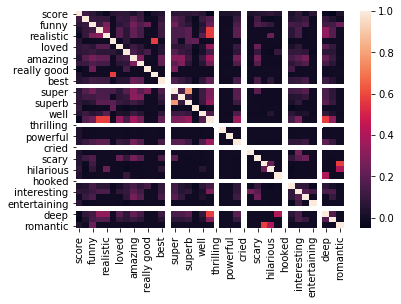

In [60]:
sns.heatmap(imdb.corr())
plt.show()

## Run The Model

In [61]:
data = imdb[words]
target = imdb['score']

In [62]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

In [63]:
print('Accurate predictions of this model configured for {} datapoints: {}'.format((len(imdb)), (target==y_pred).sum()))

Accurate predictions of this model configured for 748 datapoints: 490


### Confusion Matrix

In [64]:
conf = np.array([[((target==True) & (y_pred==True)).sum(),((target==True) & (y_pred==False)).sum()],
                 [((target==False) & (y_pred==True)).sum(),((target==False) & (y_pred==False)).sum()]])
print(conf)


[[162 224]
 [ 34 328]]


### Sensitivity - defined as the percentage of positives correctly identified


In [65]:
# Here we are defining a positive as a FALSE result (since the model is determining whether an e-mail is GENUINE) so we will 
# use that in the calculation instead of 'True':

posco = ((target==True) & (y_pred==True)).sum()
posinco = ((target==True) & (y_pred==False)).sum()
negco = ((target==False) & (y_pred==False)).sum()
neginco = ((target==False) & (y_pred==True)).sum()


print('Sensitivity: \n', negco/(negco + neginco))

Sensitivity: 
 0.906077348066


### Specificity - defined as the percentage of negatives correctly identified

In [66]:
# Defined as the converse of sensitivity- see notes above.

print('Specificity: \n', posco/(posco + posinco))

Specificity: 
 0.419689119171


### Cross-Validation

In [67]:
folds = 10

size = int(len(imdb) / folds)

count = 0

accu_mat = []

i = 1
while i <= folds:

    data = imdb[words]
    target = imdb['score']
     
    train_set = data.drop([i for i in range(count, count+size)], axis=0)
    # 'iloc' notation works OK here:
    test_set = data.iloc[count:count+size-1,:]
        
    train_target = target.drop([i for i in range(count, count+size)], axis=0)
    
    # .....but not here:
    #test_target = target.iloc(axis=0)[count:count+size-1,:]
    # so code it this way instead:
    test_target = target[count:count+size-1]
        
    bnb.fit(train_set, train_target)
    y_pred = bnb.predict(test_set)
    
    accuracy = ((y_pred == test_target).sum()) / len(test_target)
    
    accu_mat.append(format(accuracy, '.4f'))
    
    count += size
    i += 1
    
print('Here is the accuracy array for this configuration: \n', accu_mat)


Here is the accuracy array for this configuration: 
 ['0.6164', '0.8219', '0.5342', '0.7534', '0.7260', '0.8219', '0.5479', '0.5616', '0.5068', '0.3836']


### Using 1st word list:

Accurate predictions of this model configured for 748 datapoints: 467

Confusion Matrix

[[138 248]

 [ 33 329]]

Sensitivity - defined as the percentage of positives correctly identified: 
 
 0.908839779006
 
Specificity - defined as the percentage of negatives correctly identified
 
 0.357512953368
 
Cross-Validation

Here is the accuracy array for this configuration: 

 ['0.6027', '0.8219', '0.5616', '0.7671', '0.7534', '0.7397', '0.5205', '0.5479', '0.5205', '0.3425']
 
 
### Using 2nd word list:

Accurate predictions of this model configured for 748 datapoints: 399

Confusion Matrix

[[59 327]

 [ 22 340]]

Sensitivity - defined as the percentage of positives correctly identified: 

 0.939226519337
 
Specificity - defined as the percentage of negatives correctly identified
 
 0.152849740933
 
Cross-Validation

Here is the accuracy array for this configuration: 

 ['0.4932', '0.1781', '0.4247', '0.2877', '0.3288', '0.4658', '0.4521', '0.4521', '0.4110', '0.3151'] 
 
 
### Using 3rd word list:

Accurate predictions of this model configured for 748 datapoints: 490

Confusion Matrix

[[162 224]

 [ 34 328]]

Sensitivity - defined as the percentage of positives correctly identified: 

 0.906077348066
 
Specificity - defined as the percentage of negatives correctly identified
 
 0.419689119171
 
Cross-Validation

Here is the accuracy array for this configuration: 

['0.6164', '0.8219', '0.5342', '0.7534', '0.7260', '0.8219', '0.5479', '0.5616', '0.5068', '0.3836'] 


### Using 4th word list:

Accurate predictions of this model configured for 748 datapoints: 467

Confusion Matrix

[[378   8]

 [273  89]]

Sensitivity - defined as the percentage of positives correctly identified: 

 0.245856353591
 
Specificity - defined as the percentage of negatives correctly identified
 
 0.979274611399
 
Cross-Validation

Here is the accuracy array for this configuration: 

['0.6986', '0.3151', '0.7123', '0.4932', '0.4658', '0.5068', '0.7260', '0.7123', '0.6712', '0.9041']
 
 
### Using 5th word list:

Accurate predictions of this model configured for 748 datapoints: 428

Confusion Matrix

[[381   5]

 [315  47]]

Sensitivity - defined as the percentage of positives correctly identified: 

 0.129834254144
 
Specificity - defined as the percentage of negatives correctly identified
 
 0.987046632124
 
Cross-Validation

Here is the accuracy array for this configuration: 

['0.5616', '0.3288', '0.6712', '0.3425', '0.3836', '0.5342', '0.6849', '0.6438', '0.6986', '0.8219']


### Using 6th word list:

Accurate predictions of this model configured for 748 datapoints: 500

Confusion Matrix

[[377   9]

 [239 123]]

Sensitivity - defined as the percentage of positives correctly identified: 

 0.339779005525
 
Specificity - defined as the percentage of negatives correctly identified
 
 0.976683937824
 
Cross-Validation

Here is the accuracy array for this configuration: 

 ['0.6986', '0.4247', '0.7123', '0.5068', '0.5068', '0.5890', '0.7808', '0.7123', '0.7671', '0.9178']